<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-collection-and-merging-into-a-single-DataFrame" data-toc-modified-id="Data-collection-and-merging-into-a-single-DataFrame-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data collection and merging into a single DataFrame</a></span><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-settings" data-toc-modified-id="Importing-Libraries-and-settings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing Libraries and settings</a></span></li><li><span><a href="#Cleaning-the-data-station-wise" data-toc-modified-id="Cleaning-the-data-station-wise-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cleaning the data station-wise</a></span><ul class="toc-item"><li><span><a href="#Vikas-Sadan" data-toc-modified-id="Vikas-Sadan-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Vikas Sadan</a></span></li><li><span><a href="#Sector-51" data-toc-modified-id="Sector-51-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Sector 51</a></span></li><li><span><a href="#Teri-Gram" data-toc-modified-id="Teri-Gram-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Teri Gram</a></span></li><li><span><a href="#NISE" data-toc-modified-id="NISE-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>NISE</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Removing-duplicate-columns" data-toc-modified-id="Removing-duplicate-columns-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Removing duplicate columns</a></span></li><li><span><a href="#More-preprocessing..." data-toc-modified-id="More-preprocessing...-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>More preprocessing...</a></span></li></ul></li><li><span><a href="#Note" data-toc-modified-id="Note-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span><strong>Note</strong></a></span></li></ul></li></ul></div>

# Data collection and merging into a single DataFrame

We have 4 separate files for 4 stations, also with one file that has AQI calculated already. The 4 separate files had formatting issue after downloading them. There are many columns in the data frame, but we could see only 5 of them as columns. The remaining columns were wrapped as rows. So, we had to first transform it into a proper data frame that has all the columns by splitting each dataframe into multiple dataframes and then again merge them. Repeat this for all the 4 stations. Below is the sample illustration of how we preprocessed the data.

Now, we had all the columns in the dataframes for 4 stations separately. **The task** is now to merge them again into a single dataframe that has all the 4 stations along with the data that is from 2015 to 2020.

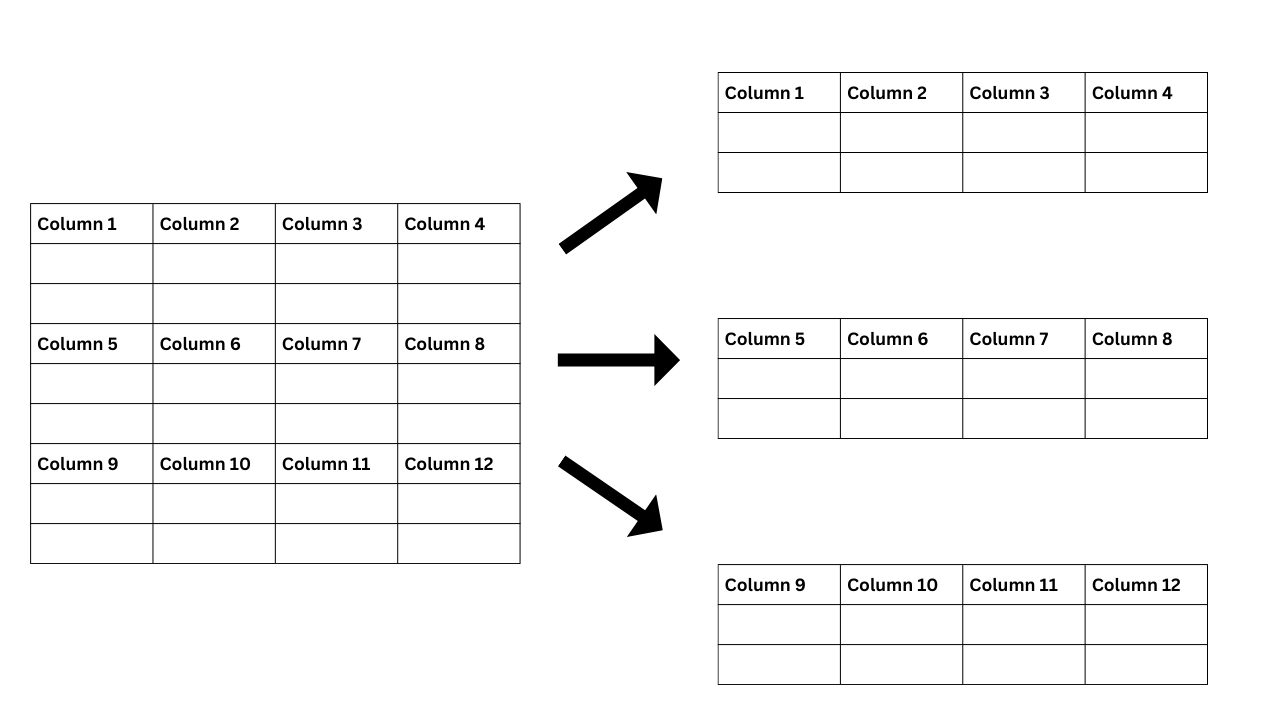

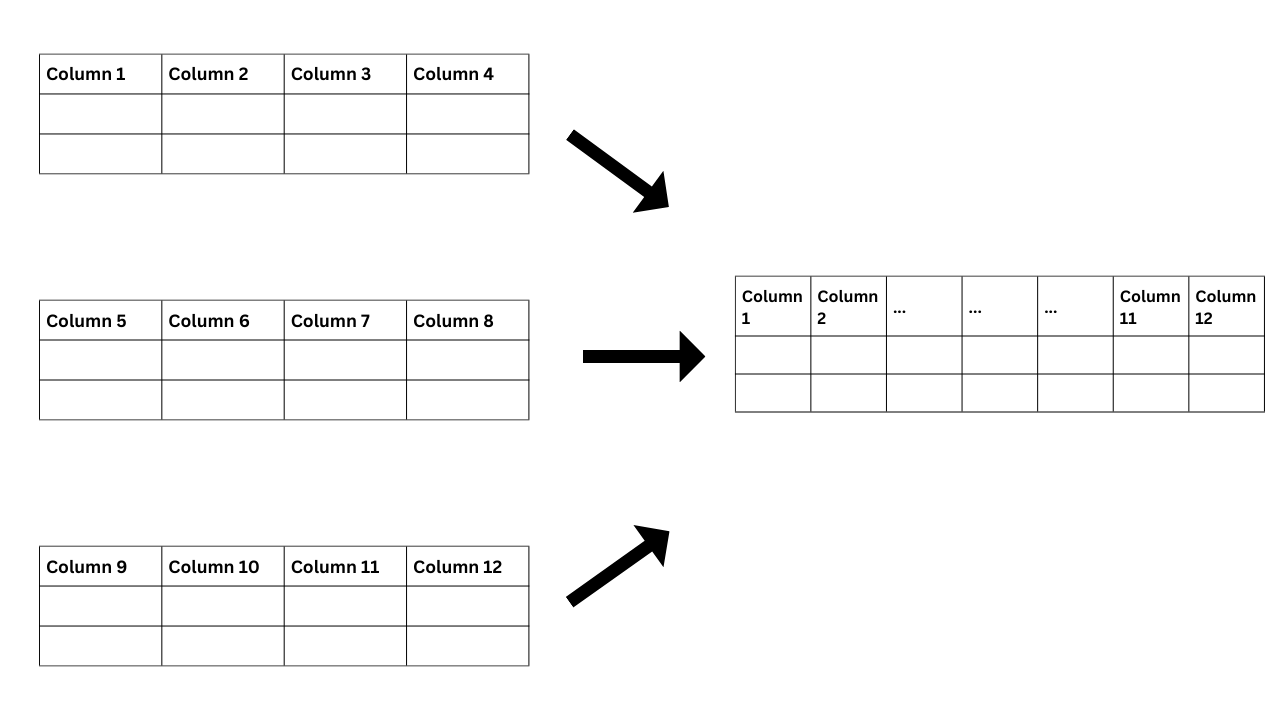

## Importing Libraries and settings

In [1]:
# For data cleaning
import numpy as np
import pandas as pd

# To print multiple outputs in a single cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Cleaning the data station-wise
- Vikas Sadan
- Sector 51
- Teri Gram
- NISE

### Vikas Sadan

In [2]:
# Reading the downloaded dataset

df_vikas_sadan = pd.read_excel("../../data/preprocessing_data/Vikas Sadan Hourly data from 4 March '20 to 26 March '23.xlsx")
df_vikas_sadan

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
0,04-03-2020 00:00,04-03-2020 01:00,60.92,141.22,61.53,144.62,10.5
1,04-03-2020 01:00,04-03-2020 02:00,56.88,177.38,56.39,170.94,5.64
2,04-03-2020 02:00,04-03-2020 03:00,63.33,302.33,40.26,262.69,7.6
3,04-03-2020 03:00,04-03-2020 04:00,67.6,377.93,29.18,317.53,10.53
4,04-03-2020 04:00,04-03-2020 05:00,72.72,319.8,33.66,273.25,9.98
...,...,...,...,...,...,...,...
214558,26-03-2023 03:00,26-03-2023 04:00,0,0,NaN,NaN,NaN
214559,26-03-2023 04:00,26-03-2023 05:00,0,0,NaN,NaN,NaN
214560,26-03-2023 05:00,26-03-2023 06:00,0,0,NaN,NaN,NaN
214561,26-03-2023 06:00,26-03-2023 07:00,0,0,NaN,NaN,NaN


In [3]:
# To see all the columns that are wrapped. 

df_vikas_sadan[df_vikas_sadan['From Date'] == 'From Date']

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
26820,From Date,To Date,CO,Ozone,Benzene,Toluene,Eth-Benzene
53641,From Date,To Date,MP-Xylene,O,Temp,RH,WS
80462,From Date,To Date,WD,SR,BP,BP,BP
107283,From Date,To Date,BP,BP,BP,BP,BP
134104,From Date,To Date,VWS,Xylene,AT,RF,RF
160925,From Date,To Date,RF,RF,RF,RF,RF
187746,From Date,To Date,RF,TOT-RF,NaN,NaN,NaN


- We see 6x7 columns being wrapped beneath. We have to unwrap it and make a single dataframe that contains all the columns 

In [4]:
# Checking the same with other value 'Prescribed Standards'

df_vikas_sadan[df_vikas_sadan['From Date'] == 'Prescribed Standards']

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
26817,Prescribed Standards,,0-4,0-180,0-5,0-5,0-5
53638,Prescribed Standards,,0-5,NaN,NaN,NaN,NaN
80459,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
107280,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
134101,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
160922,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
187743,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN


- The idea is to break down single dataframe into multiple smaller dataframes, clean them, merge them all again into a single dataframe.

In [5]:
df_vikas_sadan_part_1 = df_vikas_sadan.iloc[:26816,:]
df_vikas_sadan_part_1

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
0,04-03-2020 00:00,04-03-2020 01:00,60.92,141.22,61.53,144.62,10.5
1,04-03-2020 01:00,04-03-2020 02:00,56.88,177.38,56.39,170.94,5.64
2,04-03-2020 02:00,04-03-2020 03:00,63.33,302.33,40.26,262.69,7.6
3,04-03-2020 03:00,04-03-2020 04:00,67.6,377.93,29.18,317.53,10.53
4,04-03-2020 04:00,04-03-2020 05:00,72.72,319.8,33.66,273.25,9.98
...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,83.22,23.9,49.59,70.03,41.3
26812,26-03-2023 04:00,26-03-2023 05:00,71.96,24.25,53.15,71.91,40.56
26813,26-03-2023 05:00,26-03-2023 06:00,75.47,24.55,54.38,64.34,40.82
26814,26-03-2023 06:00,26-03-2023 07:00,69.07,23.09,54.48,72.73,39.29


In [6]:
df_vikas_sadan_part_2 = df_vikas_sadan.iloc[26817:53637,:]
df_vikas_sadan_part_2

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
26817,Prescribed Standards,,0-4,0-180,0-5,0-5,0-5
26818,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
26819,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
26820,From Date,To Date,CO,Ozone,Benzene,Toluene,Eth-Benzene
26821,04-03-2020 00:00,04-03-2020 01:00,3.01,5.08,2.04,5.98,3
...,...,...,...,...,...,...,...
53632,26-03-2023 03:00,26-03-2023 04:00,0.87,26.16,4.57,14.65,12.41
53633,26-03-2023 04:00,26-03-2023 05:00,0.66,17.46,8.22,10.45,5.4
53634,26-03-2023 05:00,26-03-2023 06:00,0.28,37.73,8.21,10.37,5.43
53635,26-03-2023 06:00,26-03-2023 07:00,0.43,22.46,8.15,10.48,5.44


In [7]:
df_vikas_sadan_part_3 = df_vikas_sadan.iloc[53638:80458 ,:]
df_vikas_sadan_part_3

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
53638,Prescribed Standards,,0-5,NaN,NaN,NaN,NaN
53639,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
53640,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
53641,From Date,To Date,MP-Xylene,O,Temp,RH,WS
53642,04-03-2020 00:00,04-03-2020 01:00,4,17.93,84.5,0.87,NaN
...,...,...,...,...,...,...,...
80453,26-03-2023 03:00,26-03-2023 04:00,23.38,20.11,81.53,0.33,NaN
80454,26-03-2023 04:00,26-03-2023 05:00,2.9,20.26,80.64,0.28,NaN
80455,26-03-2023 05:00,26-03-2023 06:00,2.92,19.96,81.06,0.3,NaN
80456,26-03-2023 06:00,26-03-2023 07:00,2.85,19.51,80.91,0.43,NaN


In [8]:
df_vikas_sadan_part_4 = df_vikas_sadan.iloc[80459:107279, :]
df_vikas_sadan_part_4

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
80459,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
80460,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
80461,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
80462,From Date,To Date,WD,SR,BP,BP,BP
80463,04-03-2020 00:00,04-03-2020 01:00,189.58,35.43,773.65,773.65,773.65
...,...,...,...,...,...,...,...
107274,26-03-2023 03:00,26-03-2023 04:00,221.25,32.58,715.7,715.7,715.7
107275,26-03-2023 04:00,26-03-2023 05:00,147.88,33.74,714.68,714.68,714.68
107276,26-03-2023 05:00,26-03-2023 06:00,72.59,31.14,715.3,715.3,715.3
107277,26-03-2023 06:00,26-03-2023 07:00,220.22,45.1,713.53,713.53,713.53


In [9]:
df_vikas_sadan_part_5 = df_vikas_sadan.iloc[107280:134100, :]
df_vikas_sadan_part_5

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
107280,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
107281,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
107282,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
107283,From Date,To Date,BP,BP,BP,BP,BP
107284,04-03-2020 00:00,04-03-2020 01:00,773.65,773.65,773.65,773.65,773.65
...,...,...,...,...,...,...,...
134095,26-03-2023 03:00,26-03-2023 04:00,715.7,715.7,715.7,715.7,715.7
134096,26-03-2023 04:00,26-03-2023 05:00,714.68,714.68,714.68,714.68,714.68
134097,26-03-2023 05:00,26-03-2023 06:00,715.3,715.3,715.3,715.3,715.3
134098,26-03-2023 06:00,26-03-2023 07:00,713.53,713.53,713.53,713.53,713.53


In [10]:
df_vikas_sadan_part_6 = df_vikas_sadan.iloc[134101:160921, :]
df_vikas_sadan_part_6

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
134101,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
134102,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
134103,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
134104,From Date,To Date,VWS,Xylene,AT,RF,RF
134105,04-03-2020 00:00,04-03-2020 01:00,-0.27,3.1,None,None,None
...,...,...,...,...,...,...,...
160916,26-03-2023 03:00,26-03-2023 04:00,-0.06,12.7,None,0,0
160917,26-03-2023 04:00,26-03-2023 05:00,-0.06,3.51,None,0,0
160918,26-03-2023 05:00,26-03-2023 06:00,-0.05,3.5,None,0,0
160919,26-03-2023 06:00,26-03-2023 07:00,-0.06,3.55,None,0,0


In [11]:
df_vikas_sadan_part_7 = df_vikas_sadan.iloc[160922:187742, :]
df_vikas_sadan_part_7

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
160922,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
160923,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
160924,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
160925,From Date,To Date,RF,RF,RF,RF,RF
160926,04-03-2020 00:00,04-03-2020 01:00,None,None,None,None,None
...,...,...,...,...,...,...,...
187737,26-03-2023 03:00,26-03-2023 04:00,0,0,0,0,0
187738,26-03-2023 04:00,26-03-2023 05:00,0,0,0,0,0
187739,26-03-2023 05:00,26-03-2023 06:00,0,0,0,0,0
187740,26-03-2023 06:00,26-03-2023 07:00,0,0,0,0,0


In [12]:
df_vikas_sadan_part_8 = df_vikas_sadan.iloc[187743:, :]
df_vikas_sadan_part_8

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
187743,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
187744,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
187745,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
187746,From Date,To Date,RF,TOT-RF,NaN,NaN,NaN
187747,04-03-2020 00:00,04-03-2020 01:00,None,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
214558,26-03-2023 03:00,26-03-2023 04:00,0,0,NaN,NaN,NaN
214559,26-03-2023 04:00,26-03-2023 05:00,0,0,NaN,NaN,NaN
214560,26-03-2023 05:00,26-03-2023 06:00,0,0,NaN,NaN,NaN
214561,26-03-2023 06:00,26-03-2023 07:00,0,0,NaN,NaN,NaN


In [13]:
# Looking at all the parts at a high-level

df_vikas_sadan_part_1
df_vikas_sadan_part_2
df_vikas_sadan_part_3
df_vikas_sadan_part_4
df_vikas_sadan_part_5
df_vikas_sadan_part_6
df_vikas_sadan_part_7
df_vikas_sadan_part_8

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
0,04-03-2020 00:00,04-03-2020 01:00,60.92,141.22,61.53,144.62,10.5
1,04-03-2020 01:00,04-03-2020 02:00,56.88,177.38,56.39,170.94,5.64
2,04-03-2020 02:00,04-03-2020 03:00,63.33,302.33,40.26,262.69,7.6
3,04-03-2020 03:00,04-03-2020 04:00,67.6,377.93,29.18,317.53,10.53
4,04-03-2020 04:00,04-03-2020 05:00,72.72,319.8,33.66,273.25,9.98
...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,83.22,23.9,49.59,70.03,41.3
26812,26-03-2023 04:00,26-03-2023 05:00,71.96,24.25,53.15,71.91,40.56
26813,26-03-2023 05:00,26-03-2023 06:00,75.47,24.55,54.38,64.34,40.82
26814,26-03-2023 06:00,26-03-2023 07:00,69.07,23.09,54.48,72.73,39.29


,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
26817,Prescribed Standards,,0-4,0-180,0-5,0-5,0-5
26818,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
26819,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
26820,From Date,To Date,CO,Ozone,Benzene,Toluene,Eth-Benzene
26821,04-03-2020 00:00,04-03-2020 01:00,3.01,5.08,2.04,5.98,3
...,...,...,...,...,...,...,...
53632,26-03-2023 03:00,26-03-2023 04:00,0.87,26.16,4.57,14.65,12.41
53633,26-03-2023 04:00,26-03-2023 05:00,0.66,17.46,8.22,10.45,5.4
53634,26-03-2023 05:00,26-03-2023 06:00,0.28,37.73,8.21,10.37,5.43
53635,26-03-2023 06:00,26-03-2023 07:00,0.43,22.46,8.15,10.48,5.44


,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
53638,Prescribed Standards,,0-5,NaN,NaN,NaN,NaN
53639,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
53640,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
53641,From Date,To Date,MP-Xylene,O,Temp,RH,WS
53642,04-03-2020 00:00,04-03-2020 01:00,4,17.93,84.5,0.87,NaN
...,...,...,...,...,...,...,...
80453,26-03-2023 03:00,26-03-2023 04:00,23.38,20.11,81.53,0.33,NaN
80454,26-03-2023 04:00,26-03-2023 05:00,2.9,20.26,80.64,0.28,NaN
80455,26-03-2023 05:00,26-03-2023 06:00,2.92,19.96,81.06,0.3,NaN
80456,26-03-2023 06:00,26-03-2023 07:00,2.85,19.51,80.91,0.43,NaN


,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
80459,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
80460,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
80461,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
80462,From Date,To Date,WD,SR,BP,BP,BP
80463,04-03-2020 00:00,04-03-2020 01:00,189.58,35.43,773.65,773.65,773.65
...,...,...,...,...,...,...,...
107274,26-03-2023 03:00,26-03-2023 04:00,221.25,32.58,715.7,715.7,715.7
107275,26-03-2023 04:00,26-03-2023 05:00,147.88,33.74,714.68,714.68,714.68
107276,26-03-2023 05:00,26-03-2023 06:00,72.59,31.14,715.3,715.3,715.3
107277,26-03-2023 06:00,26-03-2023 07:00,220.22,45.1,713.53,713.53,713.53


,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
107280,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
107281,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
107282,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
107283,From Date,To Date,BP,BP,BP,BP,BP
107284,04-03-2020 00:00,04-03-2020 01:00,773.65,773.65,773.65,773.65,773.65
...,...,...,...,...,...,...,...
134095,26-03-2023 03:00,26-03-2023 04:00,715.7,715.7,715.7,715.7,715.7
134096,26-03-2023 04:00,26-03-2023 05:00,714.68,714.68,714.68,714.68,714.68
134097,26-03-2023 05:00,26-03-2023 06:00,715.3,715.3,715.3,715.3,715.3
134098,26-03-2023 06:00,26-03-2023 07:00,713.53,713.53,713.53,713.53,713.53


,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
134101,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
134102,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
134103,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
134104,From Date,To Date,VWS,Xylene,AT,RF,RF
134105,04-03-2020 00:00,04-03-2020 01:00,-0.27,3.1,None,None,None
...,...,...,...,...,...,...,...
160916,26-03-2023 03:00,26-03-2023 04:00,-0.06,12.7,None,0,0
160917,26-03-2023 04:00,26-03-2023 05:00,-0.06,3.51,None,0,0
160918,26-03-2023 05:00,26-03-2023 06:00,-0.05,3.5,None,0,0
160919,26-03-2023 06:00,26-03-2023 07:00,-0.06,3.55,None,0,0


,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
160922,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
160923,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
160924,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
160925,From Date,To Date,RF,RF,RF,RF,RF
160926,04-03-2020 00:00,04-03-2020 01:00,None,None,None,None,None
...,...,...,...,...,...,...,...
187737,26-03-2023 03:00,26-03-2023 04:00,0,0,0,0,0
187738,26-03-2023 04:00,26-03-2023 05:00,0,0,0,0,0
187739,26-03-2023 05:00,26-03-2023 06:00,0,0,0,0,0
187740,26-03-2023 06:00,26-03-2023 07:00,0,0,0,0,0


,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
187743,Prescribed Standards,,NaN,NaN,NaN,NaN,NaN
187744,Exceeding Standards,,NaN,NaN,NaN,NaN,NaN
187745,Remarks,NaN,NaN,NaN,NaN,NaN,NaN
187746,From Date,To Date,RF,TOT-RF,NaN,NaN,NaN
187747,04-03-2020 00:00,04-03-2020 01:00,None,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
214558,26-03-2023 03:00,26-03-2023 04:00,0,0,NaN,NaN,NaN
214559,26-03-2023 04:00,26-03-2023 05:00,0,0,NaN,NaN,NaN
214560,26-03-2023 05:00,26-03-2023 06:00,0,0,NaN,NaN,NaN
214561,26-03-2023 06:00,26-03-2023 07:00,0,0,NaN,NaN,NaN


In [14]:
# Making a copy of everything

df_vikas_sadan_part_1_copy = df_vikas_sadan_part_1.copy()
df_vikas_sadan_part_2_copy = df_vikas_sadan_part_2.copy()
df_vikas_sadan_part_3_copy = df_vikas_sadan_part_3.copy()
df_vikas_sadan_part_4_copy = df_vikas_sadan_part_4.copy()
df_vikas_sadan_part_5_copy = df_vikas_sadan_part_5.copy()
df_vikas_sadan_part_6_copy = df_vikas_sadan_part_6.copy()
df_vikas_sadan_part_7_copy = df_vikas_sadan_part_7.copy()
df_vikas_sadan_part_8_copy = df_vikas_sadan_part_8.copy()

In [15]:
# Removing unwanted rows in the dataframe

df_vikas_sadan_part_2_copy = df_vikas_sadan_part_2_copy.iloc[3:,:]
df_vikas_sadan_part_2_copy

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
26820,From Date,To Date,CO,Ozone,Benzene,Toluene,Eth-Benzene
26821,04-03-2020 00:00,04-03-2020 01:00,3.01,5.08,2.04,5.98,3
26822,04-03-2020 01:00,04-03-2020 02:00,5.38,6.15,2,5.97,2.98
26823,04-03-2020 02:00,04-03-2020 03:00,1.85,12.72,2.02,6.07,2.96
26824,04-03-2020 03:00,04-03-2020 04:00,1.31,11.46,1.96,6.06,2.99
...,...,...,...,...,...,...,...
53632,26-03-2023 03:00,26-03-2023 04:00,0.87,26.16,4.57,14.65,12.41
53633,26-03-2023 04:00,26-03-2023 05:00,0.66,17.46,8.22,10.45,5.4
53634,26-03-2023 05:00,26-03-2023 06:00,0.28,37.73,8.21,10.37,5.43
53635,26-03-2023 06:00,26-03-2023 07:00,0.43,22.46,8.15,10.48,5.44


In [16]:
# Part 2

df_vikas_sadan_part_2_copy.columns = df_vikas_sadan_part_2_copy.iloc[0,:].values 
df_vikas_sadan_part_2_copy.index
df_vikas_sadan_part_2_copy.columns
df_vikas_sadan_part_2_copy.drop([26820], axis = 0, inplace=True)
df_vikas_sadan_part_2_copy # Now the dataframe is clean.

RangeIndex(start=26820, stop=53637, step=1)

Index(['From Date', 'To Date', 'CO', 'Ozone', 'Benzene', 'Toluene',
       'Eth-Benzene'],
      dtype='object')

,From Date,To Date,CO,Ozone,Benzene,Toluene,Eth-Benzene
26821,04-03-2020 00:00,04-03-2020 01:00,3.01,5.08,2.04,5.98,3
26822,04-03-2020 01:00,04-03-2020 02:00,5.38,6.15,2,5.97,2.98
26823,04-03-2020 02:00,04-03-2020 03:00,1.85,12.72,2.02,6.07,2.96
26824,04-03-2020 03:00,04-03-2020 04:00,1.31,11.46,1.96,6.06,2.99
26825,04-03-2020 04:00,04-03-2020 05:00,0.63,4.76,2.01,5.93,2.96
...,...,...,...,...,...,...,...
53632,26-03-2023 03:00,26-03-2023 04:00,0.87,26.16,4.57,14.65,12.41
53633,26-03-2023 04:00,26-03-2023 05:00,0.66,17.46,8.22,10.45,5.4
53634,26-03-2023 05:00,26-03-2023 06:00,0.28,37.73,8.21,10.37,5.43
53635,26-03-2023 06:00,26-03-2023 07:00,0.43,22.46,8.15,10.48,5.44


- Repeating the same process for all the parts

In [17]:
# Part 3

df_vikas_sadan_part_3_copy = df_vikas_sadan_part_3_copy.iloc[3:,:]
df_vikas_sadan_part_3_copy.columns = df_vikas_sadan_part_3_copy.iloc[0,:].values 
df_vikas_sadan_part_3_copy.drop([53641], axis = 0, inplace=True)
df_vikas_sadan_part_3_copy

,From Date,To Date,MP-Xylene,O,Temp,RH,WS
53642,04-03-2020 00:00,04-03-2020 01:00,4,17.93,84.5,0.87,NaN
53643,04-03-2020 01:00,04-03-2020 02:00,4.09,17.58,90.21,0.73,NaN
53644,04-03-2020 02:00,04-03-2020 03:00,3.99,17.34,91.44,0.65,NaN
53645,04-03-2020 03:00,04-03-2020 04:00,4.04,16.96,91.34,0.68,NaN
53646,04-03-2020 04:00,04-03-2020 05:00,4,16.72,91.28,0.72,NaN
...,...,...,...,...,...,...,...
80453,26-03-2023 03:00,26-03-2023 04:00,23.38,20.11,81.53,0.33,NaN
80454,26-03-2023 04:00,26-03-2023 05:00,2.9,20.26,80.64,0.28,NaN
80455,26-03-2023 05:00,26-03-2023 06:00,2.92,19.96,81.06,0.3,NaN
80456,26-03-2023 06:00,26-03-2023 07:00,2.85,19.51,80.91,0.43,NaN


In [18]:
# Part 4

df_vikas_sadan_part_4_copy = df_vikas_sadan_part_4_copy.iloc[3:,:]
df_vikas_sadan_part_4_copy.columns = df_vikas_sadan_part_4_copy.iloc[0,:].values 
df_vikas_sadan_part_4_copy.drop([80462], axis = 0, inplace=True)
df_vikas_sadan_part_4_copy

,From Date,To Date,WD,SR,BP,BP,BP
80463,04-03-2020 00:00,04-03-2020 01:00,189.58,35.43,773.65,773.65,773.65
80464,04-03-2020 01:00,04-03-2020 02:00,181.39,35.07,773.42,773.42,773.42
80465,04-03-2020 02:00,04-03-2020 03:00,168.81,34.62,772.7,772.7,772.7
80466,04-03-2020 03:00,04-03-2020 04:00,185.92,34.78,772.2,772.2,772.2
80467,04-03-2020 04:00,04-03-2020 05:00,186.83,33.48,772.15,772.15,772.15
...,...,...,...,...,...,...,...
107274,26-03-2023 03:00,26-03-2023 04:00,221.25,32.58,715.7,715.7,715.7
107275,26-03-2023 04:00,26-03-2023 05:00,147.88,33.74,714.68,714.68,714.68
107276,26-03-2023 05:00,26-03-2023 06:00,72.59,31.14,715.3,715.3,715.3
107277,26-03-2023 06:00,26-03-2023 07:00,220.22,45.1,713.53,713.53,713.53


In [19]:
# Part 5

df_vikas_sadan_part_5_copy = df_vikas_sadan_part_5.copy()
df_vikas_sadan_part_5_copy = df_vikas_sadan_part_5_copy.iloc[3:,:]
df_vikas_sadan_part_5_copy.columns = df_vikas_sadan_part_5_copy.iloc[0,:].values 
df_vikas_sadan_part_5_copy.drop([107283], axis = 0, inplace=True)
df_vikas_sadan_part_5_copy

,From Date,To Date,BP,BP,BP,BP,BP
107284,04-03-2020 00:00,04-03-2020 01:00,773.65,773.65,773.65,773.65,773.65
107285,04-03-2020 01:00,04-03-2020 02:00,773.42,773.42,773.42,773.42,773.42
107286,04-03-2020 02:00,04-03-2020 03:00,772.7,772.7,772.7,772.7,772.7
107287,04-03-2020 03:00,04-03-2020 04:00,772.2,772.2,772.2,772.2,772.2
107288,04-03-2020 04:00,04-03-2020 05:00,772.15,772.15,772.15,772.15,772.15
...,...,...,...,...,...,...,...
134095,26-03-2023 03:00,26-03-2023 04:00,715.7,715.7,715.7,715.7,715.7
134096,26-03-2023 04:00,26-03-2023 05:00,714.68,714.68,714.68,714.68,714.68
134097,26-03-2023 05:00,26-03-2023 06:00,715.3,715.3,715.3,715.3,715.3
134098,26-03-2023 06:00,26-03-2023 07:00,713.53,713.53,713.53,713.53,713.53


In [20]:
# Part 6

df_vikas_sadan_part_6_copy = df_vikas_sadan_part_6.copy()
df_vikas_sadan_part_6_copy = df_vikas_sadan_part_6_copy.iloc[3:,:]
df_vikas_sadan_part_6_copy.columns = df_vikas_sadan_part_6_copy.iloc[0,:].values 
df_vikas_sadan_part_6_copy.drop([134104], axis = 0, inplace=True)
df_vikas_sadan_part_6_copy

,From Date,To Date,VWS,Xylene,AT,RF,RF
134105,04-03-2020 00:00,04-03-2020 01:00,-0.27,3.1,None,None,None
134106,04-03-2020 01:00,04-03-2020 02:00,-0.27,3.03,None,None,None
134107,04-03-2020 02:00,04-03-2020 03:00,-0.27,3.08,None,None,None
134108,04-03-2020 03:00,04-03-2020 04:00,-0.27,3.02,None,None,None
134109,04-03-2020 04:00,04-03-2020 05:00,-0.27,2.97,None,None,None
...,...,...,...,...,...,...,...
160916,26-03-2023 03:00,26-03-2023 04:00,-0.06,12.7,None,0,0
160917,26-03-2023 04:00,26-03-2023 05:00,-0.06,3.51,None,0,0
160918,26-03-2023 05:00,26-03-2023 06:00,-0.05,3.5,None,0,0
160919,26-03-2023 06:00,26-03-2023 07:00,-0.06,3.55,None,0,0


In [21]:
# Part 7

df_vikas_sadan_part_7_copy = df_vikas_sadan_part_7.copy()
df_vikas_sadan_part_7_copy = df_vikas_sadan_part_7_copy.iloc[3:,:]
df_vikas_sadan_part_7_copy.columns = df_vikas_sadan_part_7_copy.iloc[0,:].values 
df_vikas_sadan_part_7_copy.drop([160925], axis = 0, inplace=True)
df_vikas_sadan_part_7_copy

,From Date,To Date,RF,RF,RF,RF,RF
160926,04-03-2020 00:00,04-03-2020 01:00,None,None,None,None,None
160927,04-03-2020 01:00,04-03-2020 02:00,None,None,None,None,None
160928,04-03-2020 02:00,04-03-2020 03:00,None,None,None,None,None
160929,04-03-2020 03:00,04-03-2020 04:00,None,None,None,None,None
160930,04-03-2020 04:00,04-03-2020 05:00,None,None,None,None,None
...,...,...,...,...,...,...,...
187737,26-03-2023 03:00,26-03-2023 04:00,0,0,0,0,0
187738,26-03-2023 04:00,26-03-2023 05:00,0,0,0,0,0
187739,26-03-2023 05:00,26-03-2023 06:00,0,0,0,0,0
187740,26-03-2023 06:00,26-03-2023 07:00,0,0,0,0,0


In [22]:
df_vikas_sadan_part_8_copy = df_vikas_sadan_part_8.copy()
df_vikas_sadan_part_8_copy = df_vikas_sadan_part_8_copy.iloc[3:,:]
df_vikas_sadan_part_8_copy.columns = df_vikas_sadan_part_8_copy.iloc[0,:].values 
df_vikas_sadan_part_8_copy.drop([187746], axis = 0, inplace=True)
df_vikas_sadan_part_8_copy

,From Date,To Date,RF,TOT-RF,NaN,NaN,NaN
187747,04-03-2020 00:00,04-03-2020 01:00,None,0,NaN,NaN,NaN
187748,04-03-2020 01:00,04-03-2020 02:00,None,0,NaN,NaN,NaN
187749,04-03-2020 02:00,04-03-2020 03:00,None,0,NaN,NaN,NaN
187750,04-03-2020 03:00,04-03-2020 04:00,None,0,NaN,NaN,NaN
187751,04-03-2020 04:00,04-03-2020 05:00,None,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
214558,26-03-2023 03:00,26-03-2023 04:00,0,0,NaN,NaN,NaN
214559,26-03-2023 04:00,26-03-2023 05:00,0,0,NaN,NaN,NaN
214560,26-03-2023 05:00,26-03-2023 06:00,0,0,NaN,NaN,NaN
214561,26-03-2023 06:00,26-03-2023 07:00,0,0,NaN,NaN,NaN


In [23]:
# Reviewing all the dataframes 

df_vikas_sadan_part_1_copy
df_vikas_sadan_part_2_copy
df_vikas_sadan_part_3_copy
df_vikas_sadan_part_4_copy
df_vikas_sadan_part_5_copy
df_vikas_sadan_part_6_copy
df_vikas_sadan_part_7_copy
df_vikas_sadan_part_8_copy

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2
0,04-03-2020 00:00,04-03-2020 01:00,60.92,141.22,61.53,144.62,10.5
1,04-03-2020 01:00,04-03-2020 02:00,56.88,177.38,56.39,170.94,5.64
2,04-03-2020 02:00,04-03-2020 03:00,63.33,302.33,40.26,262.69,7.6
3,04-03-2020 03:00,04-03-2020 04:00,67.6,377.93,29.18,317.53,10.53
4,04-03-2020 04:00,04-03-2020 05:00,72.72,319.8,33.66,273.25,9.98
...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,83.22,23.9,49.59,70.03,41.3
26812,26-03-2023 04:00,26-03-2023 05:00,71.96,24.25,53.15,71.91,40.56
26813,26-03-2023 05:00,26-03-2023 06:00,75.47,24.55,54.38,64.34,40.82
26814,26-03-2023 06:00,26-03-2023 07:00,69.07,23.09,54.48,72.73,39.29


,From Date,To Date,CO,Ozone,Benzene,Toluene,Eth-Benzene
26821,04-03-2020 00:00,04-03-2020 01:00,3.01,5.08,2.04,5.98,3
26822,04-03-2020 01:00,04-03-2020 02:00,5.38,6.15,2,5.97,2.98
26823,04-03-2020 02:00,04-03-2020 03:00,1.85,12.72,2.02,6.07,2.96
26824,04-03-2020 03:00,04-03-2020 04:00,1.31,11.46,1.96,6.06,2.99
26825,04-03-2020 04:00,04-03-2020 05:00,0.63,4.76,2.01,5.93,2.96
...,...,...,...,...,...,...,...
53632,26-03-2023 03:00,26-03-2023 04:00,0.87,26.16,4.57,14.65,12.41
53633,26-03-2023 04:00,26-03-2023 05:00,0.66,17.46,8.22,10.45,5.4
53634,26-03-2023 05:00,26-03-2023 06:00,0.28,37.73,8.21,10.37,5.43
53635,26-03-2023 06:00,26-03-2023 07:00,0.43,22.46,8.15,10.48,5.44


,From Date,To Date,MP-Xylene,O,Temp,RH,WS
53642,04-03-2020 00:00,04-03-2020 01:00,4,17.93,84.5,0.87,NaN
53643,04-03-2020 01:00,04-03-2020 02:00,4.09,17.58,90.21,0.73,NaN
53644,04-03-2020 02:00,04-03-2020 03:00,3.99,17.34,91.44,0.65,NaN
53645,04-03-2020 03:00,04-03-2020 04:00,4.04,16.96,91.34,0.68,NaN
53646,04-03-2020 04:00,04-03-2020 05:00,4,16.72,91.28,0.72,NaN
...,...,...,...,...,...,...,...
80453,26-03-2023 03:00,26-03-2023 04:00,23.38,20.11,81.53,0.33,NaN
80454,26-03-2023 04:00,26-03-2023 05:00,2.9,20.26,80.64,0.28,NaN
80455,26-03-2023 05:00,26-03-2023 06:00,2.92,19.96,81.06,0.3,NaN
80456,26-03-2023 06:00,26-03-2023 07:00,2.85,19.51,80.91,0.43,NaN


,From Date,To Date,WD,SR,BP,BP,BP
80463,04-03-2020 00:00,04-03-2020 01:00,189.58,35.43,773.65,773.65,773.65
80464,04-03-2020 01:00,04-03-2020 02:00,181.39,35.07,773.42,773.42,773.42
80465,04-03-2020 02:00,04-03-2020 03:00,168.81,34.62,772.7,772.7,772.7
80466,04-03-2020 03:00,04-03-2020 04:00,185.92,34.78,772.2,772.2,772.2
80467,04-03-2020 04:00,04-03-2020 05:00,186.83,33.48,772.15,772.15,772.15
...,...,...,...,...,...,...,...
107274,26-03-2023 03:00,26-03-2023 04:00,221.25,32.58,715.7,715.7,715.7
107275,26-03-2023 04:00,26-03-2023 05:00,147.88,33.74,714.68,714.68,714.68
107276,26-03-2023 05:00,26-03-2023 06:00,72.59,31.14,715.3,715.3,715.3
107277,26-03-2023 06:00,26-03-2023 07:00,220.22,45.1,713.53,713.53,713.53


,From Date,To Date,BP,BP,BP,BP,BP
107284,04-03-2020 00:00,04-03-2020 01:00,773.65,773.65,773.65,773.65,773.65
107285,04-03-2020 01:00,04-03-2020 02:00,773.42,773.42,773.42,773.42,773.42
107286,04-03-2020 02:00,04-03-2020 03:00,772.7,772.7,772.7,772.7,772.7
107287,04-03-2020 03:00,04-03-2020 04:00,772.2,772.2,772.2,772.2,772.2
107288,04-03-2020 04:00,04-03-2020 05:00,772.15,772.15,772.15,772.15,772.15
...,...,...,...,...,...,...,...
134095,26-03-2023 03:00,26-03-2023 04:00,715.7,715.7,715.7,715.7,715.7
134096,26-03-2023 04:00,26-03-2023 05:00,714.68,714.68,714.68,714.68,714.68
134097,26-03-2023 05:00,26-03-2023 06:00,715.3,715.3,715.3,715.3,715.3
134098,26-03-2023 06:00,26-03-2023 07:00,713.53,713.53,713.53,713.53,713.53


,From Date,To Date,VWS,Xylene,AT,RF,RF
134105,04-03-2020 00:00,04-03-2020 01:00,-0.27,3.1,None,None,None
134106,04-03-2020 01:00,04-03-2020 02:00,-0.27,3.03,None,None,None
134107,04-03-2020 02:00,04-03-2020 03:00,-0.27,3.08,None,None,None
134108,04-03-2020 03:00,04-03-2020 04:00,-0.27,3.02,None,None,None
134109,04-03-2020 04:00,04-03-2020 05:00,-0.27,2.97,None,None,None
...,...,...,...,...,...,...,...
160916,26-03-2023 03:00,26-03-2023 04:00,-0.06,12.7,None,0,0
160917,26-03-2023 04:00,26-03-2023 05:00,-0.06,3.51,None,0,0
160918,26-03-2023 05:00,26-03-2023 06:00,-0.05,3.5,None,0,0
160919,26-03-2023 06:00,26-03-2023 07:00,-0.06,3.55,None,0,0


,From Date,To Date,RF,RF,RF,RF,RF
160926,04-03-2020 00:00,04-03-2020 01:00,None,None,None,None,None
160927,04-03-2020 01:00,04-03-2020 02:00,None,None,None,None,None
160928,04-03-2020 02:00,04-03-2020 03:00,None,None,None,None,None
160929,04-03-2020 03:00,04-03-2020 04:00,None,None,None,None,None
160930,04-03-2020 04:00,04-03-2020 05:00,None,None,None,None,None
...,...,...,...,...,...,...,...
187737,26-03-2023 03:00,26-03-2023 04:00,0,0,0,0,0
187738,26-03-2023 04:00,26-03-2023 05:00,0,0,0,0,0
187739,26-03-2023 05:00,26-03-2023 06:00,0,0,0,0,0
187740,26-03-2023 06:00,26-03-2023 07:00,0,0,0,0,0


,From Date,To Date,RF,TOT-RF,NaN,NaN,NaN
187747,04-03-2020 00:00,04-03-2020 01:00,None,0,NaN,NaN,NaN
187748,04-03-2020 01:00,04-03-2020 02:00,None,0,NaN,NaN,NaN
187749,04-03-2020 02:00,04-03-2020 03:00,None,0,NaN,NaN,NaN
187750,04-03-2020 03:00,04-03-2020 04:00,None,0,NaN,NaN,NaN
187751,04-03-2020 04:00,04-03-2020 05:00,None,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
214558,26-03-2023 03:00,26-03-2023 04:00,0,0,NaN,NaN,NaN
214559,26-03-2023 04:00,26-03-2023 05:00,0,0,NaN,NaN,NaN
214560,26-03-2023 05:00,26-03-2023 06:00,0,0,NaN,NaN,NaN
214561,26-03-2023 06:00,26-03-2023 07:00,0,0,NaN,NaN,NaN


In [24]:
# Fixing the indexing part of dataframes

df_vikas_sadan_part_1_copy_reindex = df_vikas_sadan_part_1_copy.copy().reset_index()
df_vikas_sadan_part_2_copy_reindex = df_vikas_sadan_part_2_copy.copy().reset_index()
df_vikas_sadan_part_3_copy_reindex = df_vikas_sadan_part_3_copy.copy().reset_index()
df_vikas_sadan_part_4_copy_reindex = df_vikas_sadan_part_4_copy.copy().reset_index()
df_vikas_sadan_part_5_copy_reindex = df_vikas_sadan_part_5_copy.copy().reset_index()
df_vikas_sadan_part_6_copy_reindex = df_vikas_sadan_part_6_copy.copy().reset_index()
df_vikas_sadan_part_7_copy_reindex = df_vikas_sadan_part_7_copy.copy().reset_index()
df_vikas_sadan_part_8_copy_reindex = df_vikas_sadan_part_8_copy.copy().reset_index()

In [25]:
# Merge into a single dataframe

frames = [
    df_vikas_sadan_part_1_copy_reindex,
    df_vikas_sadan_part_2_copy_reindex,
    df_vikas_sadan_part_3_copy_reindex,
    df_vikas_sadan_part_4_copy_reindex,
    df_vikas_sadan_part_5_copy_reindex,
    df_vikas_sadan_part_6_copy_reindex,
    df_vikas_sadan_part_7_copy_reindex,
    df_vikas_sadan_part_8_copy_reindex
]
df_vikas_sadan_combined = pd.concat(frames, axis = 1)
df_vikas_sadan_combined.drop(['index'], axis = 1, inplace = True)
df_vikas_sadan_combined

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2,From Date,To Date,CO,...,RF,RF,RF,From Date,To Date,RF,TOT-RF,NaN,NaN,NaN
0,04-03-2020 00:00,04-03-2020 01:00,60.92,141.22,61.53,144.62,10.5,04-03-2020 00:00,04-03-2020 01:00,3.01,...,None,None,None,04-03-2020 00:00,04-03-2020 01:00,None,0,NaN,NaN,NaN
1,04-03-2020 01:00,04-03-2020 02:00,56.88,177.38,56.39,170.94,5.64,04-03-2020 01:00,04-03-2020 02:00,5.38,...,None,None,None,04-03-2020 01:00,04-03-2020 02:00,None,0,NaN,NaN,NaN
2,04-03-2020 02:00,04-03-2020 03:00,63.33,302.33,40.26,262.69,7.6,04-03-2020 02:00,04-03-2020 03:00,1.85,...,None,None,None,04-03-2020 02:00,04-03-2020 03:00,None,0,NaN,NaN,NaN
3,04-03-2020 03:00,04-03-2020 04:00,67.6,377.93,29.18,317.53,10.53,04-03-2020 03:00,04-03-2020 04:00,1.31,...,None,None,None,04-03-2020 03:00,04-03-2020 04:00,None,0,NaN,NaN,NaN
4,04-03-2020 04:00,04-03-2020 05:00,72.72,319.8,33.66,273.25,9.98,04-03-2020 04:00,04-03-2020 05:00,0.63,...,None,None,None,04-03-2020 04:00,04-03-2020 05:00,None,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,83.22,23.9,49.59,70.03,41.3,26-03-2023 03:00,26-03-2023 04:00,0.87,...,0,0,0,26-03-2023 03:00,26-03-2023 04:00,0,0,NaN,NaN,NaN
26812,26-03-2023 04:00,26-03-2023 05:00,71.96,24.25,53.15,71.91,40.56,26-03-2023 04:00,26-03-2023 05:00,0.66,...,0,0,0,26-03-2023 04:00,26-03-2023 05:00,0,0,NaN,NaN,NaN
26813,26-03-2023 05:00,26-03-2023 06:00,75.47,24.55,54.38,64.34,40.82,26-03-2023 05:00,26-03-2023 06:00,0.28,...,0,0,0,26-03-2023 05:00,26-03-2023 06:00,0,0,NaN,NaN,NaN
26814,26-03-2023 06:00,26-03-2023 07:00,69.07,23.09,54.48,72.73,39.29,26-03-2023 06:00,26-03-2023 07:00,0.43,...,0,0,0,26-03-2023 06:00,26-03-2023 07:00,0,0,NaN,NaN,NaN


### Sector 51

In [26]:
df_sector_51 = pd.read_excel("../../data/preprocessing_data/Sector 51 Hourly data from 4 March '20 to 26 March '23.xlsx")
df_sector_51

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx
0,04-03-2020 00:00,04-03-2020 01:00,None,None,None,None,None
1,04-03-2020 01:00,04-03-2020 02:00,None,None,None,None,None
2,04-03-2020 02:00,04-03-2020 03:00,None,None,None,None,None
3,04-03-2020 03:00,04-03-2020 04:00,None,None,None,None,None
4,04-03-2020 04:00,04-03-2020 05:00,None,None,None,None,None
...,...,...,...,...,...,...,...
134140,26-03-2023 12:00,26-03-2023 13:00,0,NaN,NaN,NaN,NaN
134141,26-03-2023 13:00,26-03-2023 14:00,0,NaN,NaN,NaN,NaN
134142,26-03-2023 14:00,26-03-2023 15:00,0,NaN,NaN,NaN,NaN
134143,26-03-2023 15:00,26-03-2023 16:00,0,NaN,NaN,NaN,NaN


In [27]:
df_sector_51_part_1 = df_sector_51.iloc[:26825,:]
df_sector_51_part_2 = df_sector_51.iloc[26829:53655,:]
df_sector_51_part_3 = df_sector_51.iloc[53659:80485,:]
df_sector_51_part_4 = df_sector_51.iloc[80489:107315,:]
df_sector_51_part_5 = df_sector_51.iloc[107319:,:]

df_sector_51_part_2.columns = df_sector_51_part_2.iloc[0,:].values
df_sector_51_part_2 = df_sector_51_part_2.iloc[1:,:]

df_sector_51_part_3.columns = df_sector_51_part_3.iloc[0,:].values
df_sector_51_part_3 = df_sector_51_part_3.iloc[1:,:]

df_sector_51_part_4.columns = df_sector_51_part_4.iloc[0,:].values
df_sector_51_part_4 = df_sector_51_part_4.iloc[1:,:]

df_sector_51_part_5.columns = df_sector_51_part_5.iloc[0,:].values
df_sector_51_part_5 = df_sector_51_part_5.iloc[1:,:]

df_sector_51_part_2 = df_sector_51_part_2.reset_index()
df_sector_51_part_2.drop(['index'], axis = 1, inplace = True)

df_sector_51_part_3 = df_sector_51_part_3.reset_index()
df_sector_51_part_3.drop(['index'], axis = 1, inplace = True)

df_sector_51_part_4 = df_sector_51_part_4.reset_index()
df_sector_51_part_4.drop(['index'], axis = 1, inplace = True)

df_sector_51_part_5 = df_sector_51_part_5.reset_index()
df_sector_51_part_5.drop(['index'], axis = 1, inplace = True)

frames = [
        df_sector_51_part_1,
        df_sector_51_part_2,
        df_sector_51_part_3,
        df_sector_51_part_4,
        df_sector_51_part_5
    ]

df_sector_51_combined = pd.concat(frames, axis = 1)
df_sector_51_combined

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,From Date,To Date,NH3,...,Xylene,AT,RF,From Date,To Date,TOT-RF,NaN,NaN,NaN,NaN
0,04-03-2020 00:00,04-03-2020 01:00,None,None,None,None,None,04-03-2020 00:00,04-03-2020 01:00,None,...,None,None,None,04-03-2020 00:00,04-03-2020 01:00,0,NaN,NaN,NaN,NaN
1,04-03-2020 01:00,04-03-2020 02:00,None,None,None,None,None,04-03-2020 01:00,04-03-2020 02:00,None,...,None,None,None,04-03-2020 01:00,04-03-2020 02:00,0,NaN,NaN,NaN,NaN
2,04-03-2020 02:00,04-03-2020 03:00,None,None,None,None,None,04-03-2020 02:00,04-03-2020 03:00,None,...,None,None,None,04-03-2020 02:00,04-03-2020 03:00,0,NaN,NaN,NaN,NaN
3,04-03-2020 03:00,04-03-2020 04:00,None,None,None,None,None,04-03-2020 03:00,04-03-2020 04:00,None,...,None,None,None,04-03-2020 03:00,04-03-2020 04:00,0,NaN,NaN,NaN,NaN
4,04-03-2020 04:00,04-03-2020 05:00,None,None,None,None,None,04-03-2020 04:00,04-03-2020 05:00,None,...,None,None,None,04-03-2020 04:00,04-03-2020 05:00,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26820,26-03-2023 12:00,26-03-2023 13:00,79.9,147.95,12.23,30.99,24.74,26-03-2023 12:00,26-03-2023 13:00,100.09,...,None,27.93,0,26-03-2023 12:00,26-03-2023 13:00,0,NaN,NaN,NaN,NaN
26821,26-03-2023 13:00,26-03-2023 14:00,86.35,159.93,7.93,31.41,21.17,26-03-2023 13:00,26-03-2023 14:00,101.46,...,None,28.23,0,26-03-2023 13:00,26-03-2023 14:00,0,NaN,NaN,NaN,NaN
26822,26-03-2023 14:00,26-03-2023 15:00,85.3,158,5.51,31.52,12.85,26-03-2023 14:00,26-03-2023 15:00,101.81,...,None,28.48,0,26-03-2023 14:00,26-03-2023 15:00,0,NaN,NaN,NaN,NaN
26823,26-03-2023 15:00,26-03-2023 16:00,86.78,160.78,2.86,27.01,14.85,26-03-2023 15:00,26-03-2023 16:00,87.24,...,None,None,0,26-03-2023 15:00,26-03-2023 16:00,0,NaN,NaN,NaN,NaN


### Teri Gram

In [28]:
df_teri_gram = pd.read_excel("../../data/preprocessing_data/Teri Gram Hourly data from 4 March '20 to 26 March '23.xlsx")
df_teri_gram_part_1 = df_teri_gram.iloc[:26816,:]
df_teri_gram_part_2 = df_teri_gram.iloc[26820:53637,:]
df_teri_gram_part_3 = df_teri_gram.iloc[53641:80458,:]
df_teri_gram_part_4 = df_teri_gram.iloc[80462:107279,:]
df_teri_gram_part_5 = df_teri_gram.iloc[107283:,:]

df_teri_gram_part_2.columns = df_teri_gram_part_2.iloc[0,:].values
df_teri_gram_part_2 = df_teri_gram_part_2.iloc[1:,:]

df_teri_gram_part_3.columns = df_teri_gram_part_3.iloc[0,:].values
df_teri_gram_part_3 = df_teri_gram_part_3.iloc[1:,:]

df_teri_gram_part_4.columns = df_teri_gram_part_4.iloc[0,:].values
df_teri_gram_part_4 = df_teri_gram_part_4.iloc[1:,:]

df_teri_gram_part_5.columns = df_teri_gram_part_5.iloc[0,:].values
df_teri_gram_part_5 = df_teri_gram_part_5.iloc[1:,:]

df_teri_gram_part_2 = df_teri_gram_part_2.reset_index()
df_teri_gram_part_2.drop(['index'], axis = 1, inplace = True)

df_teri_gram_part_3 = df_teri_gram_part_3.reset_index()
df_teri_gram_part_3.drop(['index'], axis = 1, inplace = True)

df_teri_gram_part_4 = df_teri_gram_part_4.reset_index()
df_teri_gram_part_4.drop(['index'], axis = 1, inplace = True)

df_teri_gram_part_5 = df_teri_gram_part_5.reset_index()
df_teri_gram_part_5.drop(['index'], axis = 1, inplace = True)

frames = [
        df_teri_gram_part_1,
        df_teri_gram_part_2,
        df_teri_gram_part_3,
        df_teri_gram_part_4,
        df_teri_gram_part_5
    ]

df_teri_gram_combined = pd.concat(frames, axis = 1)
df_teri_gram_combined

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,From Date,To Date,NH3,...,Xylene,AT,RF,From Date,To Date,TOT-RF,NaN,NaN,NaN,NaN
0,04-03-2020 00:00,04-03-2020 01:00,None,None,None,None,None,04-03-2020 00:00,04-03-2020 01:00,None,...,None,None,None,04-03-2020 00:00,04-03-2020 01:00,0,NaN,NaN,NaN,NaN
1,04-03-2020 01:00,04-03-2020 02:00,None,None,None,None,None,04-03-2020 01:00,04-03-2020 02:00,None,...,None,None,None,04-03-2020 01:00,04-03-2020 02:00,0,NaN,NaN,NaN,NaN
2,04-03-2020 02:00,04-03-2020 03:00,None,None,None,None,None,04-03-2020 02:00,04-03-2020 03:00,None,...,None,None,None,04-03-2020 02:00,04-03-2020 03:00,0,NaN,NaN,NaN,NaN
3,04-03-2020 03:00,04-03-2020 04:00,None,None,None,None,None,04-03-2020 03:00,04-03-2020 04:00,None,...,None,None,None,04-03-2020 03:00,04-03-2020 04:00,0,NaN,NaN,NaN,NaN
4,04-03-2020 04:00,04-03-2020 05:00,None,None,None,None,None,04-03-2020 04:00,04-03-2020 05:00,None,...,None,None,None,04-03-2020 04:00,04-03-2020 05:00,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,64.75,266.52,16.85,6.92,17.12,26-03-2023 03:00,26-03-2023 04:00,52.21,...,None,17.47,None,26-03-2023 03:00,26-03-2023 04:00,0,NaN,NaN,NaN,NaN
26812,26-03-2023 04:00,26-03-2023 05:00,88.17,285.07,18.63,6.1,18.12,26-03-2023 04:00,26-03-2023 05:00,55.18,...,None,17.02,None,26-03-2023 04:00,26-03-2023 05:00,0,NaN,NaN,NaN,NaN
26813,26-03-2023 05:00,26-03-2023 06:00,116.45,278.62,14.24,5.93,14.52,26-03-2023 05:00,26-03-2023 06:00,46.18,...,None,17.49,None,26-03-2023 05:00,26-03-2023 06:00,0,NaN,NaN,NaN,NaN
26814,26-03-2023 06:00,26-03-2023 07:00,105.82,266.82,12.7,6.06,13.35,26-03-2023 06:00,26-03-2023 07:00,46.92,...,None,17.54,None,26-03-2023 06:00,26-03-2023 07:00,0,NaN,NaN,NaN,NaN


### NISE

In [29]:
df_nise = pd.read_excel("../../data/preprocessing_data/NISE Hourly data from 4 March '20 to 26 March '23.xlsx")

df_nise_part_1 = df_nise.iloc[:26816,:]
df_nise_part_2 = df_nise.iloc[26820:,:]

df_nise_part_2.columns = df_nise_part_2.iloc[0,:].values
df_nise_part_2 = df_nise_part_2.iloc[1:,:]

df_nise_part_2 = df_nise_part_2.reset_index()
df_nise_part_2.drop(['index'], axis = 1, inplace = True)

frames = [
        df_nise_part_1,
        df_nise_part_2
    ]

df_nise_combined = pd.concat(frames, axis = 1)
df_nise_combined

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,From Date,To Date,CO,Ozone,CO2,RF,TOT-RF
0,04-03-2020 00:00,04-03-2020 01:00,88.67,184.54,17.92,31.11,49.03,04-03-2020 00:00,04-03-2020 01:00,2.55,5.99,None,None,0
1,04-03-2020 01:00,04-03-2020 02:00,82.42,178.92,16.9,29.54,46.43,04-03-2020 01:00,04-03-2020 02:00,2.42,6.72,None,None,0
2,04-03-2020 02:00,04-03-2020 03:00,82.35,187.56,17.71,29.56,47.33,04-03-2020 02:00,04-03-2020 03:00,2.4,6.11,None,None,0
3,04-03-2020 03:00,04-03-2020 04:00,102.34,211.59,18.05,27.9,45.92,04-03-2020 03:00,04-03-2020 04:00,2.36,4.63,None,None,0
4,04-03-2020 04:00,04-03-2020 05:00,97.36,181.5,15.49,23.88,39.35,04-03-2020 04:00,04-03-2020 05:00,2.24,4.6,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,78.09,177.02,89.5,90.71,180.19,26-03-2023 03:00,26-03-2023 04:00,1.44,8.26,None,None,0
26812,26-03-2023 04:00,26-03-2023 05:00,69.69,168.73,73.6,84.08,157.66,26-03-2023 04:00,26-03-2023 05:00,1.24,8.14,None,None,0
26813,26-03-2023 05:00,26-03-2023 06:00,58.84,141.35,28.63,78.13,106.67,26-03-2023 05:00,26-03-2023 06:00,0.98,9.22,None,None,0
26814,26-03-2023 06:00,26-03-2023 07:00,74.18,129.04,7.12,68,75.1,26-03-2023 06:00,26-03-2023 07:00,0.71,9.86,None,None,0


## Preprocessing

### Removing duplicate columns

In [30]:
df_nise_combined = df_nise_combined.loc[:,~df_nise_combined.columns.duplicated()]
df_nise_combined

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,CO,Ozone,CO2,RF,TOT-RF
0,04-03-2020 00:00,04-03-2020 01:00,88.67,184.54,17.92,31.11,49.03,2.55,5.99,None,None,0
1,04-03-2020 01:00,04-03-2020 02:00,82.42,178.92,16.9,29.54,46.43,2.42,6.72,None,None,0
2,04-03-2020 02:00,04-03-2020 03:00,82.35,187.56,17.71,29.56,47.33,2.4,6.11,None,None,0
3,04-03-2020 03:00,04-03-2020 04:00,102.34,211.59,18.05,27.9,45.92,2.36,4.63,None,None,0
4,04-03-2020 04:00,04-03-2020 05:00,97.36,181.5,15.49,23.88,39.35,2.24,4.6,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,78.09,177.02,89.5,90.71,180.19,1.44,8.26,None,None,0
26812,26-03-2023 04:00,26-03-2023 05:00,69.69,168.73,73.6,84.08,157.66,1.24,8.14,None,None,0
26813,26-03-2023 05:00,26-03-2023 06:00,58.84,141.35,28.63,78.13,106.67,0.98,9.22,None,None,0
26814,26-03-2023 06:00,26-03-2023 07:00,74.18,129.04,7.12,68,75.1,0.71,9.86,None,None,0


In [31]:
df_vikas_sadan_combined = df_vikas_sadan_combined.loc[:,~df_vikas_sadan_combined.columns.duplicated()]
df_vikas_sadan_combined

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,...,WS,WD,SR,BP,VWS,Xylene,AT,RF,TOT-RF,NaN
0,04-03-2020 00:00,04-03-2020 01:00,60.92,141.22,61.53,144.62,10.5,3.01,5.08,2.04,...,NaN,189.58,35.43,773.65,-0.27,3.1,None,None,0,NaN
1,04-03-2020 01:00,04-03-2020 02:00,56.88,177.38,56.39,170.94,5.64,5.38,6.15,2,...,NaN,181.39,35.07,773.42,-0.27,3.03,None,None,0,NaN
2,04-03-2020 02:00,04-03-2020 03:00,63.33,302.33,40.26,262.69,7.6,1.85,12.72,2.02,...,NaN,168.81,34.62,772.7,-0.27,3.08,None,None,0,NaN
3,04-03-2020 03:00,04-03-2020 04:00,67.6,377.93,29.18,317.53,10.53,1.31,11.46,1.96,...,NaN,185.92,34.78,772.2,-0.27,3.02,None,None,0,NaN
4,04-03-2020 04:00,04-03-2020 05:00,72.72,319.8,33.66,273.25,9.98,0.63,4.76,2.01,...,NaN,186.83,33.48,772.15,-0.27,2.97,None,None,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,83.22,23.9,49.59,70.03,41.3,0.87,26.16,4.57,...,NaN,221.25,32.58,715.7,-0.06,12.7,None,0,0,NaN
26812,26-03-2023 04:00,26-03-2023 05:00,71.96,24.25,53.15,71.91,40.56,0.66,17.46,8.22,...,NaN,147.88,33.74,714.68,-0.06,3.51,None,0,0,NaN
26813,26-03-2023 05:00,26-03-2023 06:00,75.47,24.55,54.38,64.34,40.82,0.28,37.73,8.21,...,NaN,72.59,31.14,715.3,-0.05,3.5,None,0,0,NaN
26814,26-03-2023 06:00,26-03-2023 07:00,69.07,23.09,54.48,72.73,39.29,0.43,22.46,8.15,...,NaN,220.22,45.1,713.53,-0.06,3.55,None,0,0,NaN


In [32]:
df_sector_51_combined = df_sector_51_combined.loc[:,~df_sector_51_combined.columns.duplicated()]
df_sector_51_combined

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,MP-Xylene,RH,WS,WD,SR,Xylene,AT,RF,TOT-RF,NaN
0,04-03-2020 00:00,04-03-2020 01:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
1,04-03-2020 01:00,04-03-2020 02:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
2,04-03-2020 02:00,04-03-2020 03:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
3,04-03-2020 03:00,04-03-2020 04:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
4,04-03-2020 04:00,04-03-2020 05:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26820,26-03-2023 12:00,26-03-2023 13:00,79.9,147.95,12.23,30.99,24.74,100.09,1.5,0.59,...,6.04,30.63,0.86,314.53,153.28,None,27.93,0,0,NaN
26821,26-03-2023 13:00,26-03-2023 14:00,86.35,159.93,7.93,31.41,21.17,101.46,1.44,0.53,...,5.36,29.62,1.25,310.9,123.88,None,28.23,0,0,NaN
26822,26-03-2023 14:00,26-03-2023 15:00,85.3,158,5.51,31.52,12.85,101.81,1.16,0.32,...,3.22,30.73,1.18,309.19,109.1,None,28.48,0,0,NaN
26823,26-03-2023 15:00,26-03-2023 16:00,86.78,160.78,2.86,27.01,14.85,87.24,None,0.4,...,1.81,None,1.44,310.49,86.8,None,None,0,0,NaN


In [33]:
df_teri_gram_combined = df_teri_gram_combined.loc[:,~df_teri_gram_combined.columns.duplicated()]
df_teri_gram_combined

,From Date,To Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,...,MP-Xylene,RH,WS,WD,SR,Xylene,AT,RF,TOT-RF,NaN
0,04-03-2020 00:00,04-03-2020 01:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
1,04-03-2020 01:00,04-03-2020 02:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
2,04-03-2020 02:00,04-03-2020 03:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
3,04-03-2020 03:00,04-03-2020 04:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
4,04-03-2020 04:00,04-03-2020 05:00,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,64.75,266.52,16.85,6.92,17.12,52.21,18.19,0.9,...,0.83,98.34,0.63,193.28,16.9,None,17.47,None,0,NaN
26812,26-03-2023 04:00,26-03-2023 05:00,88.17,285.07,18.63,6.1,18.12,55.18,14.92,0.77,...,0.87,99.13,0.7,280.22,17.05,None,17.02,None,0,NaN
26813,26-03-2023 05:00,26-03-2023 06:00,116.45,278.62,14.24,5.93,14.52,46.18,13.69,0.72,...,0.73,98.8,0.97,256.56,17.07,None,17.49,None,0,NaN
26814,26-03-2023 06:00,26-03-2023 07:00,105.82,266.82,12.7,6.06,13.35,46.92,14.45,0.66,...,0.57,94.81,0.89,337.79,169,None,17.54,None,0,NaN


### More preprocessing...

In [34]:
# Assigning the station value in each station

df_nise_combined['Station'] = 'NISE'
df_vikas_sadan_combined['Station'] = 'Vikas Sadan'
df_sector_51_combined['Station'] = 'Sector 51'
df_teri_gram_combined['Station'] = 'Teri Gram'

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_31003/2935669774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nise_combined['Station'] = 'NISE'
/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_31003/2935669774.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vikas_sadan_combined['Station'] = 'Vikas Sadan'
/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_31003/2935669774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [35]:
# Checking all the columns 

df_vikas_sadan_combined.columns
df_sector_51_combined.columns
df_vikas_sadan_combined.columns.difference(df_sector_51_combined.columns)
df_sector_51_combined.columns.difference(df_vikas_sadan_combined.columns)

Index([  'From Date',     'To Date',       'PM2.5',          'NO',
               'NO2',         'NOx',         'SO2',          'CO',
             'Ozone',     'Benzene',     'Toluene', 'Eth-Benzene',
         'MP-Xylene',           'O',        'Temp',          'RH',
                'WS',          'WD',          'SR',          'BP',
               'VWS',      'Xylene',          'AT',          'RF',
            'TOT-RF',           nan,     'Station'],
      dtype='object')

Index([  'From Date',     'To Date',       'PM2.5',        'PM10',
                'NO',         'NO2',         'NOx',         'NH3',
               'SO2',          'CO',       'Ozone',     'Benzene',
           'Toluene', 'Eth-Benzene',   'MP-Xylene',          'RH',
                'WS',          'WD',          'SR',      'Xylene',
                'AT',          'RF',      'TOT-RF',           nan,
           'Station'],
      dtype='object')

Index(['BP', 'O', 'Temp', 'VWS'], dtype='object')

Index(['NH3', 'PM10'], dtype='object')

In [36]:
# Total number of rows in merged dataset

df_nise_combined.shape[0] + df_vikas_sadan_combined.shape[0] + df_sector_51_combined.shape[0] + df_teri_gram_combined.shape[0]

107273

In [37]:
frames = [
        df_vikas_sadan_combined,
        df_sector_51_combined,
        df_nise_combined,
        df_teri_gram_combined
    ]

df_combined = pd.concat(frames, axis = 0)
df_combined

,From Date,To Date,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,Benzene,...,VWS,Xylene,AT,RF,TOT-RF,NaN,Station,PM10,NH3,CO2
0,04-03-2020 00:00,04-03-2020 01:00,60.92,141.22,61.53,144.62,10.5,3.01,5.08,2.04,...,-0.27,3.1,None,None,0,NaN,Vikas Sadan,NaN,NaN,NaN
1,04-03-2020 01:00,04-03-2020 02:00,56.88,177.38,56.39,170.94,5.64,5.38,6.15,2,...,-0.27,3.03,None,None,0,NaN,Vikas Sadan,NaN,NaN,NaN
2,04-03-2020 02:00,04-03-2020 03:00,63.33,302.33,40.26,262.69,7.6,1.85,12.72,2.02,...,-0.27,3.08,None,None,0,NaN,Vikas Sadan,NaN,NaN,NaN
3,04-03-2020 03:00,04-03-2020 04:00,67.6,377.93,29.18,317.53,10.53,1.31,11.46,1.96,...,-0.27,3.02,None,None,0,NaN,Vikas Sadan,NaN,NaN,NaN
4,04-03-2020 04:00,04-03-2020 05:00,72.72,319.8,33.66,273.25,9.98,0.63,4.76,2.01,...,-0.27,2.97,None,None,0,NaN,Vikas Sadan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,64.75,16.85,6.92,17.12,18.19,0.9,None,6.65,...,NaN,None,17.47,None,0,NaN,Teri Gram,266.52,52.21,NaN
26812,26-03-2023 04:00,26-03-2023 05:00,88.17,18.63,6.1,18.12,14.92,0.77,23.53,7.52,...,NaN,None,17.02,None,0,NaN,Teri Gram,285.07,55.18,NaN
26813,26-03-2023 05:00,26-03-2023 06:00,116.45,14.24,5.93,14.52,13.69,0.72,23.54,7.92,...,NaN,None,17.49,None,0,NaN,Teri Gram,278.62,46.18,NaN
26814,26-03-2023 06:00,26-03-2023 07:00,105.82,12.7,6.06,13.35,14.45,0.66,23.56,7.39,...,NaN,None,17.54,None,0,NaN,Teri Gram,266.82,46.92,NaN


In [38]:
df_combined.drop([np.nan], axis=1, inplace = True) # Drop NaN

In [39]:
df_combined.columns # NaN is removed

Index(['From Date', 'To Date', 'PM2.5', 'NO', 'NO2', 'NOx', 'SO2', 'CO',
       'Ozone', 'Benzene', 'Toluene', 'Eth-Benzene', 'MP-Xylene', 'O', 'Temp',
       'RH', 'WS', 'WD', 'SR', 'BP', 'VWS', 'Xylene', 'AT', 'RF', 'TOT-RF',
       'Station', 'PM10', 'NH3', 'CO2'],
      dtype='object')

In [40]:
# Rearranging the columns for better readability

df_combined = df_combined[[  'From Date',     'To Date',  'Station',     'PM2.5',       
                       'NO',
               'NO2',         'NOx',         'SO2',          'CO',
             'Ozone',     'Benzene',     'Toluene', 'Eth-Benzene',
         'MP-Xylene',           'O',        'Temp',          'RH',
                'WS',          'WD',          'SR',          'BP',
               'VWS',      'Xylene',          'AT',          'RF',
            'TOT-RF',         'PM10',
               'NH3',         'CO2']]
df_combined

,From Date,To Date,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,...,SR,BP,VWS,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2
0,04-03-2020 00:00,04-03-2020 01:00,Vikas Sadan,60.92,141.22,61.53,144.62,10.5,3.01,5.08,...,35.43,773.65,-0.27,3.1,None,None,0,NaN,NaN,NaN
1,04-03-2020 01:00,04-03-2020 02:00,Vikas Sadan,56.88,177.38,56.39,170.94,5.64,5.38,6.15,...,35.07,773.42,-0.27,3.03,None,None,0,NaN,NaN,NaN
2,04-03-2020 02:00,04-03-2020 03:00,Vikas Sadan,63.33,302.33,40.26,262.69,7.6,1.85,12.72,...,34.62,772.7,-0.27,3.08,None,None,0,NaN,NaN,NaN
3,04-03-2020 03:00,04-03-2020 04:00,Vikas Sadan,67.6,377.93,29.18,317.53,10.53,1.31,11.46,...,34.78,772.2,-0.27,3.02,None,None,0,NaN,NaN,NaN
4,04-03-2020 04:00,04-03-2020 05:00,Vikas Sadan,72.72,319.8,33.66,273.25,9.98,0.63,4.76,...,33.48,772.15,-0.27,2.97,None,None,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26811,26-03-2023 03:00,26-03-2023 04:00,Teri Gram,64.75,16.85,6.92,17.12,18.19,0.9,None,...,16.9,NaN,NaN,None,17.47,None,0,266.52,52.21,NaN
26812,26-03-2023 04:00,26-03-2023 05:00,Teri Gram,88.17,18.63,6.1,18.12,14.92,0.77,23.53,...,17.05,NaN,NaN,None,17.02,None,0,285.07,55.18,NaN
26813,26-03-2023 05:00,26-03-2023 06:00,Teri Gram,116.45,14.24,5.93,14.52,13.69,0.72,23.54,...,17.07,NaN,NaN,None,17.49,None,0,278.62,46.18,NaN
26814,26-03-2023 06:00,26-03-2023 07:00,Teri Gram,105.82,12.7,6.06,13.35,14.45,0.66,23.56,...,169,NaN,NaN,None,17.54,None,0,266.82,46.92,NaN


In [41]:
# We see 107273 rows but indexing is wrong. So, fixing it.

df_combined = df_combined.reset_index()
df_combined.drop(['index'], axis = 1, inplace = True)
df_combined

,From Date,To Date,Station,PM2.5,NO,NO2,NOx,SO2,CO,Ozone,...,SR,BP,VWS,Xylene,AT,RF,TOT-RF,PM10,NH3,CO2
0,04-03-2020 00:00,04-03-2020 01:00,Vikas Sadan,60.92,141.22,61.53,144.62,10.5,3.01,5.08,...,35.43,773.65,-0.27,3.1,None,None,0,NaN,NaN,NaN
1,04-03-2020 01:00,04-03-2020 02:00,Vikas Sadan,56.88,177.38,56.39,170.94,5.64,5.38,6.15,...,35.07,773.42,-0.27,3.03,None,None,0,NaN,NaN,NaN
2,04-03-2020 02:00,04-03-2020 03:00,Vikas Sadan,63.33,302.33,40.26,262.69,7.6,1.85,12.72,...,34.62,772.7,-0.27,3.08,None,None,0,NaN,NaN,NaN
3,04-03-2020 03:00,04-03-2020 04:00,Vikas Sadan,67.6,377.93,29.18,317.53,10.53,1.31,11.46,...,34.78,772.2,-0.27,3.02,None,None,0,NaN,NaN,NaN
4,04-03-2020 04:00,04-03-2020 05:00,Vikas Sadan,72.72,319.8,33.66,273.25,9.98,0.63,4.76,...,33.48,772.15,-0.27,2.97,None,None,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107268,26-03-2023 03:00,26-03-2023 04:00,Teri Gram,64.75,16.85,6.92,17.12,18.19,0.9,None,...,16.9,NaN,NaN,None,17.47,None,0,266.52,52.21,NaN
107269,26-03-2023 04:00,26-03-2023 05:00,Teri Gram,88.17,18.63,6.1,18.12,14.92,0.77,23.53,...,17.05,NaN,NaN,None,17.02,None,0,285.07,55.18,NaN
107270,26-03-2023 05:00,26-03-2023 06:00,Teri Gram,116.45,14.24,5.93,14.52,13.69,0.72,23.54,...,17.07,NaN,NaN,None,17.49,None,0,278.62,46.18,NaN
107271,26-03-2023 06:00,26-03-2023 07:00,Teri Gram,105.82,12.7,6.06,13.35,14.45,0.66,23.56,...,169,NaN,NaN,None,17.54,None,0,266.82,46.92,NaN


In [45]:
# Save the dataframe to csv file

# df_combined.to_csv('Gurugram_hourly_4_stations_4_March_20_to_26_March_23.csv')

## **Note**
- The dataframe ***"df_combined"*** has data from 2020 to 2023.
-  We also had data from 2015-2020 as a separate file from another source, which had AQI calculated already.
- The dataframe ***"df_combined"*** dataset is merged into 2015-2020 data by Rudra Chatterjee (team member in this Omdena project ) and we finally have the merged data from 2015 to 2023.
- The dataset name is ***"Gurugram_Hourly_Compiled.csv"***